# Flight 07 N2468Z - Stall Testing Bank & Pitch Angles

Stall tests of BD-4C N2468Z on 21 March 2019 at St. Charles County Smartt Airport (KSET).

## Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../..')
from MglEfisPlotter import *

In [2]:
plt.rcParams['figure.figsize'] = (14, 10)

Load the flights from the file exported from the MGL iEFIS.

In [3]:
datafile = 'IEFISBB.DAT'

flights = createFlights(datafile)
for i in range(0, len(flights)):
    print(i, ':', flights[i])

f = flights[-1]
p = Plot(f)
print(f)

0 : Flight at 2019-03-19 16:38:54 to 2019-03-19 17:10:15,  8005 messages, timestamps 484,903,348 to 484,905,614
1 : Flight at 2019-03-20 15:10:04 to 2019-03-20 15:15:09,  1280 messages, timestamps 485,028,482 to 485,028,806
2 : Flight at 2019-03-20 15:31:45 to 2019-03-20 15:52:06,  5011 messages, timestamps 485,029,867 to 485,031,171
3 : Flight at 2019-03-19 16:38:54 to 2019-03-21 15:12:06, 21226 messages, timestamps 485,153,850 to 485,159,685
Flight at 2019-03-19 16:38:54 to 2019-03-21 15:12:06, 21226 messages, timestamps 485,153,850 to 485,159,685


## Graphs

In [4]:
xlim = (24, 55)

In [5]:
t = f.listData('asi')
asi = pd.DataFrame(t, columns=['minutes', 'asi'])

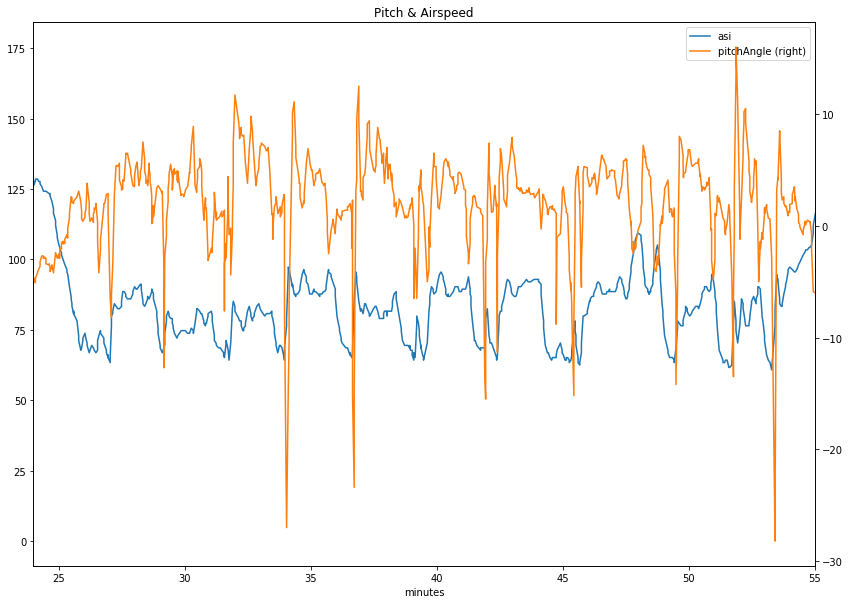

In [6]:
t = f.listData('pitchAngle')
pitch = pd.DataFrame(t, columns=['minutes', 'pitchAngle'])

merged = asi.merge(pitch)
merged.plot(x='minutes', secondary_y='pitchAngle', xlim=xlim, title='Pitch & Airspeed')
plt.savefig('pitch.png')

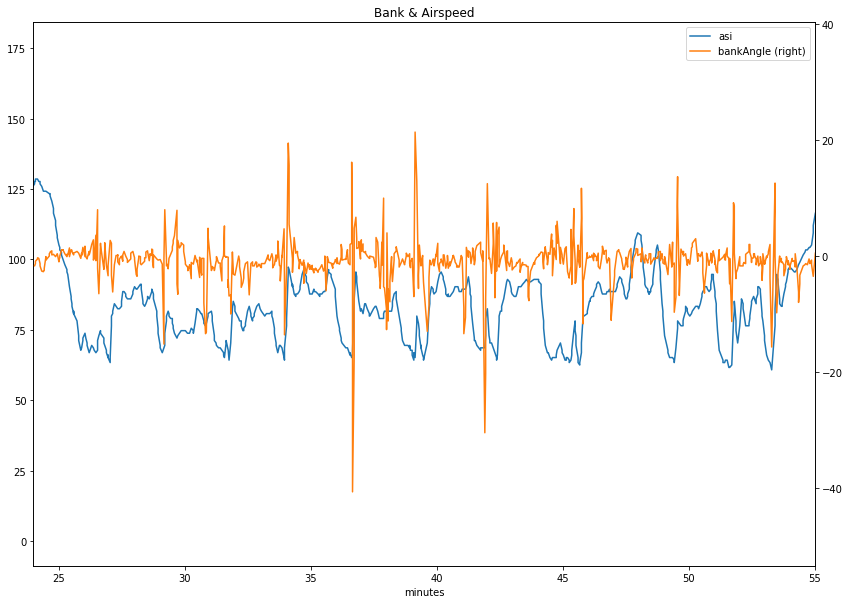

In [7]:
t = f.listData('bankAngle')
bank = pd.DataFrame(t, columns=['minutes', 'bankAngle'])

merged = asi.merge(bank)
merged.plot(x='minutes', secondary_y='bankAngle', xlim=xlim, title='Bank & Airspeed')
plt.savefig('bank.png')

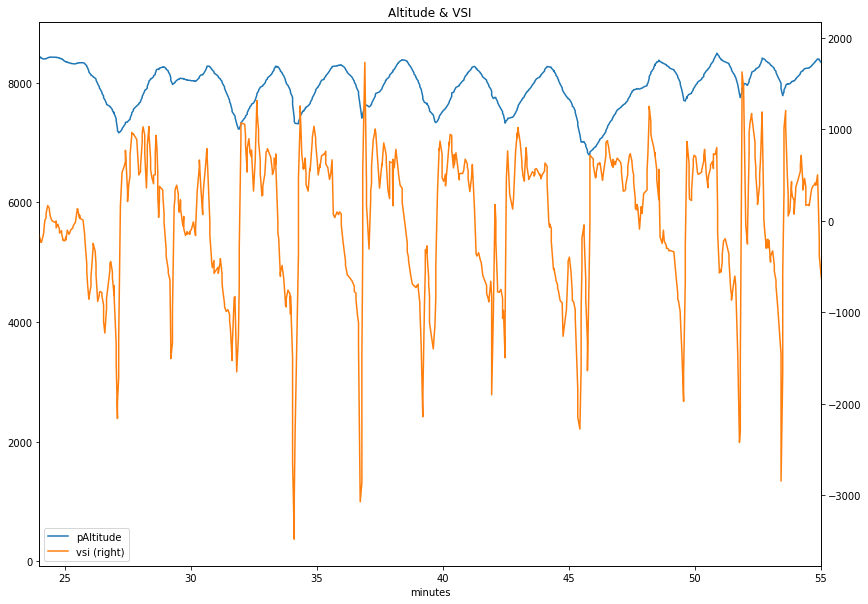

In [8]:
pAltitude = pd.DataFrame(f.listData('pAltitude'), columns=['minutes', 'pAltitude'])
vsi = pd.DataFrame(f.listData('vsi'), columns=['minutes', 'vsi'])

merged = pAltitude.merge(vsi)
merged.plot(x='minutes', secondary_y='vsi', xlim=xlim, title='Altitude & VSI')
plt.savefig('altitude.png')

In [9]:
p.flight.saveCsv('stall.csv', ['asi', 'vsi', 'pAltitude', 'pitchAngle', 'bankAngle'])